In [5]:
import numpy as np
import pandas as pd
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder, StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Load the ARFF files
train_data, _ = arff.loadarff('C:\\Users\\Killian\\Desktop\\Killian\\TrainingData\\KDDTrain+.arff')
test_data, _ = arff.loadarff('C:\\Users\\Killian\\Desktop\\Killian\\TrainingData\\KDDTest+.arff')

# Convert to pandas DataFrame
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

# Encode categorical features
label_encoders = {}
for column in train_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])
    test_df[column] = le.transform(test_df[column])
    label_encoders[column] = le

# Separate features and labels
X_train = train_df.drop('class', axis=1).values
y_train = train_df['class'].values
X_test = test_df.drop('class', axis=1).values
y_test = test_df['class'].values

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to integers
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Convert to PyTorch tensors
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [6]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

# Hyperparameters
input_size = X_train.shape[1]
hidden_size = 128
num_classes = len(np.unique(y_train))
num_epochs = 20
learning_rate = 0.001

# Initialize the model, loss function, and optimizer
model = MLP(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Epoch [1/20], Step [100/1969], Loss: 0.0377
Epoch [1/20], Step [200/1969], Loss: 0.1486
Epoch [1/20], Step [300/1969], Loss: 0.1076
Epoch [1/20], Step [400/1969], Loss: 0.0378
Epoch [1/20], Step [500/1969], Loss: 0.0458
Epoch [1/20], Step [600/1969], Loss: 0.0362
Epoch [1/20], Step [700/1969], Loss: 0.0041
Epoch [1/20], Step [800/1969], Loss: 0.0330
Epoch [1/20], Step [900/1969], Loss: 0.0386
Epoch [1/20], Step [1000/1969], Loss: 0.0128
Epoch [1/20], Step [1100/1969], Loss: 0.0231
Epoch [1/20], Step [1200/1969], Loss: 0.0348
Epoch [1/20], Step [1300/1969], Loss: 0.0286
Epoch [1/20], Step [1400/1969], Loss: 0.1008
Epoch [1/20], Step [1500/1969], Loss: 0.1062
Epoch [1/20], Step [1600/1969], Loss: 0.0048
Epoch [1/20], Step [1700/1969], Loss: 0.0257
Epoch [1/20], Step [1800/1969], Loss: 0.0117
Epoch [1/20], Step [1900/1969], Loss: 0.0230
Epoch [2/20], Step [100/1969], Loss: 0.0158
Epoch [2/20], Step [200/1969], Loss: 0.0284
Epoch [2/20], Step [300/1969], Loss: 0.0327
Epoch [2/20], Step [40

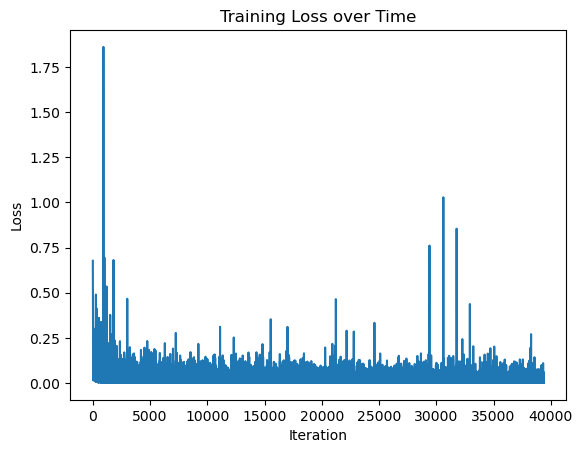

Accuracy of the model on the test set: 80.27%


In [7]:
# Initialize list to store loss values
loss_values = []
# Training loop
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Store loss value
        loss_values.append(loss.item())

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# Plot the loss values
plt.plot(loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss over Time')
plt.show()

# Testing the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the test set: {100 * correct / total:.2f}%')

In [8]:
# Testing the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the test set: {100 * correct / total:.2f}%')

Accuracy of the model on the test set: 80.27%
